In [50]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [104]:
def set_ticklabels(ax, size=18):
    ticklabels_x = ax.get_xticklabels()
    ticklabels_y = ax.get_yticklabels()

    for label_x in ticklabels_x:
        label_x.set_fontsize(size)
        label_x.set_family('serif')
    for label_y in ticklabels_y:
        label_y.set_fontsize(size)
        label_y.set_family('serif')

In [51]:
import pandas as ps

In [52]:
data = ps.read_csv("../data/multiphase/results.csv")

In [53]:
data.describe()

,ID,H_em,P_cl,T_ICM,T_cl,Z_cl,beta_cl,chisq,cloud_Rin,cloud_Rout,...,grid_rnd_seed,id,n_HI_ICM,n_HI_cl,r_cl,r_gal,sigma_cl,sigma_i,vinf_cl,zeta_Z
count,2488.000000,2488.000000,2488.000000,2.488000e+03,2488.000000,2488.000000,2488.000000,2488.000000,2488.0,2488.0,...,2488.0,2488.000000,2.488000e+03,2488.000000,2488.000000,2488.0,2488.000000,2488.000000,2488.000000,2488.000000
mean,1243.500000,1751.326718,0.503793,1.003851e+07,19765.405626,0.273294,1.812311,860.619135,0.0,5000.0,...,123456.0,1243.500000,7.824821e-08,0.624261,115.141952,5000.0,52.347079,52.405229,403.213443,0.014685
std,718.368058,719.642994,0.290414,1.238160e+07,12517.563531,0.254519,0.408114,960.596762,0.0,0.0,...,0.0,718.368058,1.866427e-07,0.731703,49.115420,0.0,27.264105,27.270420,230.905401,0.022529
min,0.000000,501.423700,0.000239,3.000902e+05,5008.272000,0.030007,1.100000,38.638837,0.0,5000.0,...,123456.0,0.000000,1.005050e-12,0.030072,30.036630,5000.0,0.000000,5.029782,0.000000,0.000100
25%,621.750000,1136.036250,0.257945,1.113740e+06,9150.848250,0.070621,1.460000,355.792811,0.0,5000.0,...,123456.0,621.750000,3.505727e-11,0.090140,72.363635,5000.0,28.564707,28.462385,205.757975,0.000627
50%,1243.500000,1733.591500,0.498750,4.183082e+06,16161.255000,0.165121,1.820000,593.984932,0.0,5000.0,...,123456.0,1243.500000,1.174529e-09,0.291594,114.176400,5000.0,52.302395,51.810935,398.557600,0.003414
75%,1865.250000,2365.887500,0.754240,1.489513e+07,28610.990000,0.412259,2.170000,1062.118310,0.0,5000.0,...,123456.0,1865.250000,3.257601e-08,0.912260,158.348575,5000.0,75.712417,75.430875,608.059750,0.017760
max,2487.000000,2998.644000,0.999992,4.977452e+07,49941.730000,0.998844,2.500000,18551.424190,0.0,5000.0,...,123456.0,2487.000000,9.980237e-07,2.996807,199.968800,5000.0,99.997650,99.964350,799.663300,0.099932


In [182]:
n_best  = 80
chisq = data.chisq
sorted_id = argsort(chisq)
best_models = data.loc[sorted_id[:n_best]]
print chisq[sorted_id[:n_best]]

chisq
791      38.638837
977      47.331794
546      53.315136
2379     58.843287
1219     62.468029
2027     62.826131
995      63.993050
1244     66.428234
295      67.913657
685      68.691086
1835     68.765021
1613     72.464969
1438     73.078329
1515     73.449075
1847     74.459831
2250     75.759094
1289     75.936072
2423     77.275136
692      78.667847
687      79.648420
358      79.714706
479      81.436941
1224     81.786787
1223     84.124880
346      84.501631
216      86.419536
1875     87.026138
9        87.718832
1486     88.257806
539      88.834443
           ...    
2066    102.680284
534     103.251660
1528    104.142387
309     104.340496
1067    105.005077
641     105.338947
1855    105.575989
484     105.745977
2474    106.095014
1860    106.785499
229     106.872108
383     107.596944
282     109.774526
1       110.023480
801     112.514235
1499    113.087356
1099    113.215139
253     113.835664
2433    113.865685
1273    114.137289
289     114.434270
591   

In [183]:
best_models.describe()

,ID,H_em,P_cl,T_ICM,T_cl,Z_cl,beta_cl,chisq,cloud_Rin,cloud_Rout,...,grid_rnd_seed,id,n_HI_ICM,n_HI_cl,r_cl,r_gal,sigma_cl,sigma_i,vinf_cl,zeta_Z
count,80.000000,80.000000,80.000000,8.000000e+01,80.000000,80.000000,80.000000,80.000000,80.0,80.0,...,80.0,80.000000,8.000000e+01,80.000000,80.000000,80.0,80.000000,80.000000,80.000000,80.000000
mean,1201.212500,1690.129461,0.650298,9.155432e+06,20052.863025,0.338873,1.776000,93.026121,0.0,5000.0,...,123456.0,1201.212500,2.510418e-08,0.880988,109.095654,5000.0,69.280215,55.709955,128.198486,0.015694
std,698.899455,671.465127,0.271270,1.062407e+07,12730.092737,0.270418,0.452357,18.462730,0.0,0.0,...,0.0,698.899455,5.735014e-08,0.850530,46.802534,0.0,19.397438,27.539046,147.886656,0.022081
min,1.000000,504.174300,0.066267,3.026044e+05,5172.863000,0.034761,1.100000,38.638837,0.0,5000.0,...,123456.0,1.000000,1.122026e-12,0.032025,30.465330,5000.0,14.699420,6.284950,1.372696,0.000103
25%,579.750000,1177.948250,0.470718,1.279694e+06,8337.994750,0.104072,1.282500,79.698135,0.0,5000.0,...,123456.0,579.750000,5.226532e-11,0.221859,65.845505,5000.0,57.223942,32.821230,38.045002,0.000719
50%,1234.000000,1623.306000,0.729495,4.651914e+06,17501.100000,0.237006,1.795000,98.186400,0.0,5000.0,...,123456.0,1234.000000,1.192729e-09,0.562500,106.580350,5000.0,71.647375,52.190555,79.375780,0.004717
75%,1765.500000,2244.556000,0.874123,1.522995e+07,30960.962500,0.555507,2.190000,106.807151,0.0,5000.0,...,123456.0,1765.500000,1.645577e-08,1.412629,147.213325,5000.0,84.979692,77.841335,127.101900,0.025462
max,2474.000000,2977.269000,0.997368,4.237722e+07,49324.640000,0.975173,2.480000,116.698619,0.0,5000.0,...,123456.0,2474.000000,3.461074e-07,2.960838,198.651900,5000.0,99.785090,99.852490,652.890000,0.095748


5 0.666574450814 0.436717324183
10 0.821028287229 0.626400990686
15 0.878251965818 0.709541824843


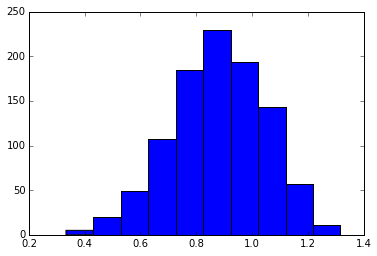

In [184]:
n_items = [5,10,15]

for n_i in n_items:
    n_try = 1000
    frac = np.zeros(n_try)
    for i in range(n_try):
        x_all = np.linspace(0.0,1.0,2500)
        x_some = random.random(n_i)
        q_all  = percentile(x_all, q=[16,50,84])
        q_some = percentile(x_some, q=[16,50,84])
        frac[i] = (q_some[2]-q_some[0])/(q_all[2]-q_all[0])
    print n_i, mean(frac), mean(frac) - std(frac)
a = hist(frac)


In [185]:
def plot_distros(fullsample, subsample, chi2sub, labelx):
    fig = plt.figure(1, figsize=(11,5))
    plt.clf()

    #plt.set_ticklabels(ax, size=35)
    n_full = len(fullsample)
    n_sub = len(subsample)
    #print type(fullsample)
    #print fullsample
    int_full = linspace(0.0,1.0,n_full)
    int_sub = linspace(0.0, 1.0, n_sub)
   
    plt.subplot(121)
    plt.plot(sort(fullsample), int_full ,label=r'${\rm Full\ Sample}$')
    plt.plot(sort(subsample), int_sub, label=r'${\rm Best\ Sample}$')
    plt.legend(loc=2, prop={'size':20})
    
    ax = plt.gca()
    set_ticklabels(ax, size=15)
    plt.xlabel(labelx, fontsize=20)
    plt.ylabel(r'${\rm Integrated\ Distribution}$', fontsize=20)
    
    plt.subplot(122)
    plt.scatter(subsample, chi2sub)
    
    ax = plt.gca()
    set_ticklabels(ax, size=15)
    plt.xlabel(labelx, fontsize=20)
    plt.ylabel(r'$\chi^2$', fontsize=20)
    
    plt.savefig(labelx+'.png')
    plt.show(fig)
    plt.close(fig)

----
H_em
0.790831748016
[ 1085.03244  1623.306    2431.51884]


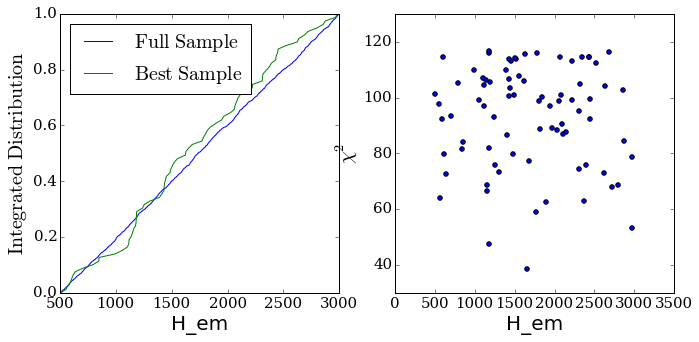

----
P_cl
0.796967052637
[ 0.37612222  0.72949535  0.92119408]


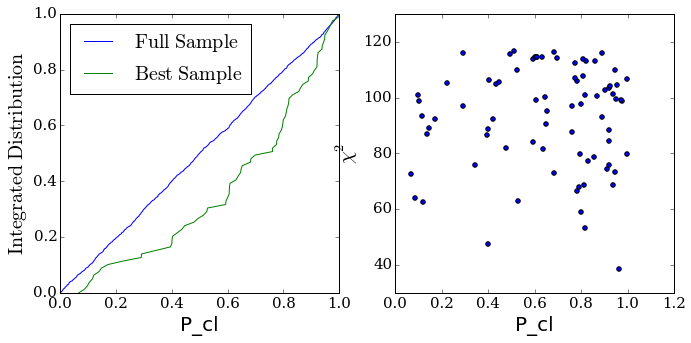

----
T_ICM
0.917956134872
[ 5.86766399  6.66763163  7.24346928]


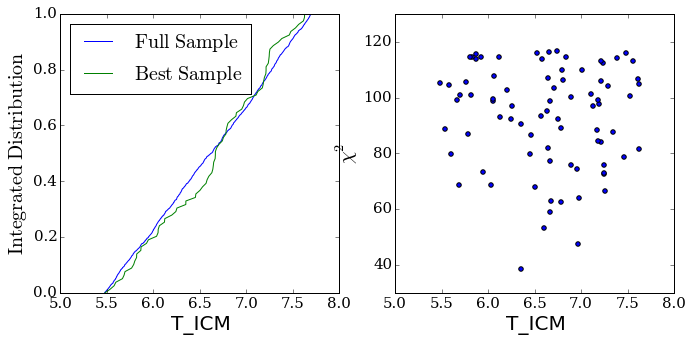

----
T_cl
0.985899213274
[ 3.86763635  4.24306535  4.53234083]


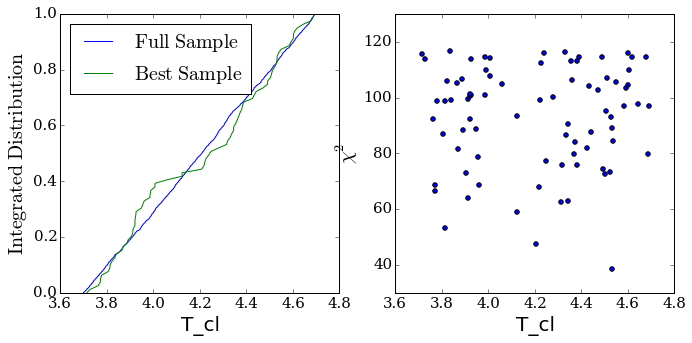

----
beta_cl
1.1325
[ 1.2064  1.795   2.2936]


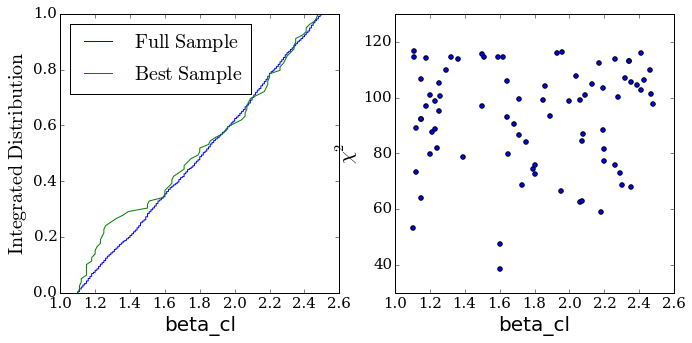

----
f_cl
0.699896573284
[ 3.42705297  4.70625708  6.86423361]


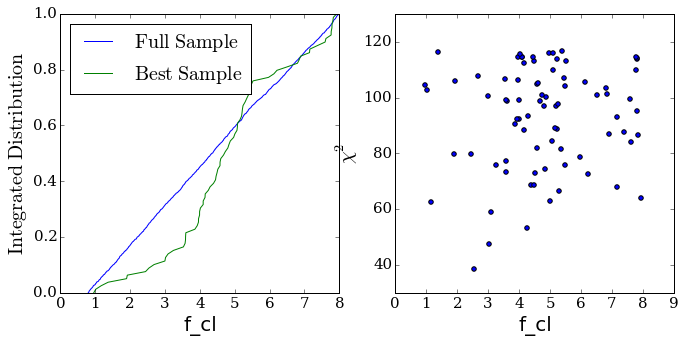

----
n_HI_ICM
0.839257437922
[-10.87767605  -8.9234584   -7.44244524]


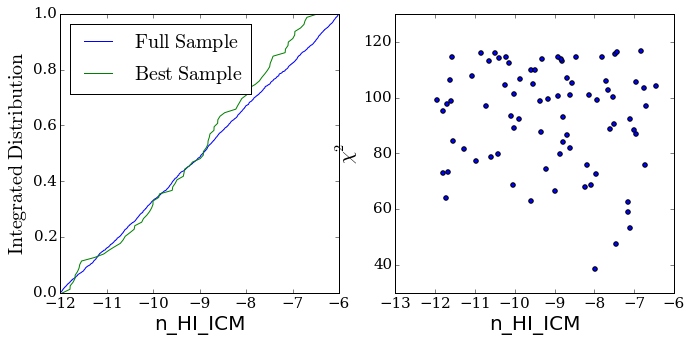

----
n_HI_cl
0.881951118165
[-0.95853381 -0.24987716  0.22860848]


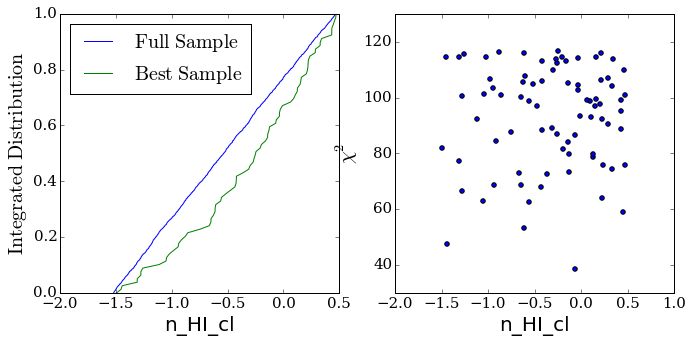

----
r_cl
0.856917720672
[  60.5764336  106.58035    160.95088  ]


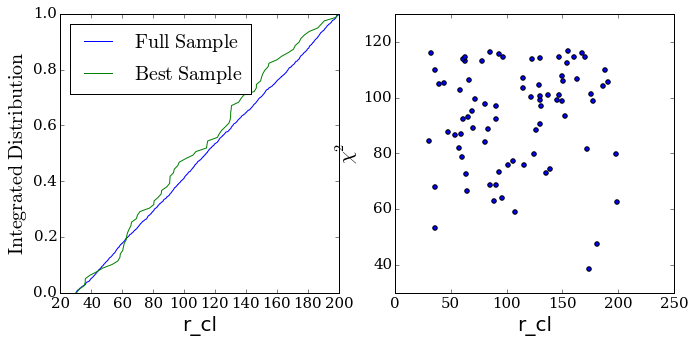

----
sigma_cl
0.654848154134
[ 46.3522264  71.647375   88.3027644]


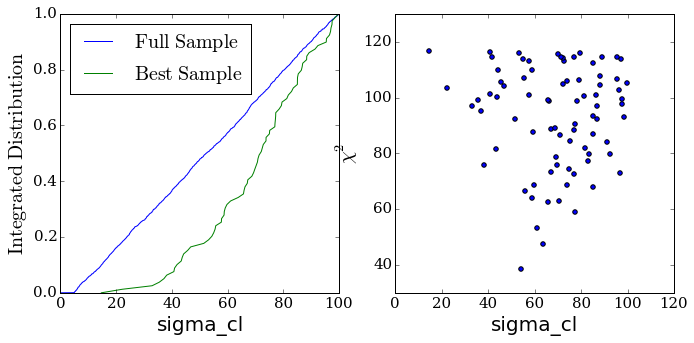

----
sigma_i
0.998803084283
[ 22.1121632  52.190555   85.981982 ]


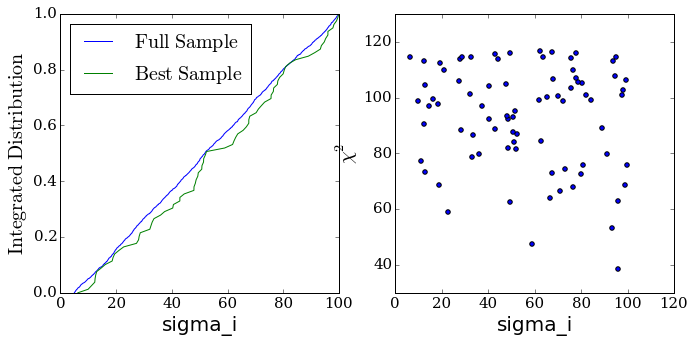

----
vinf_cl
0.418144690361
[  19.766426   79.37578   246.740288]


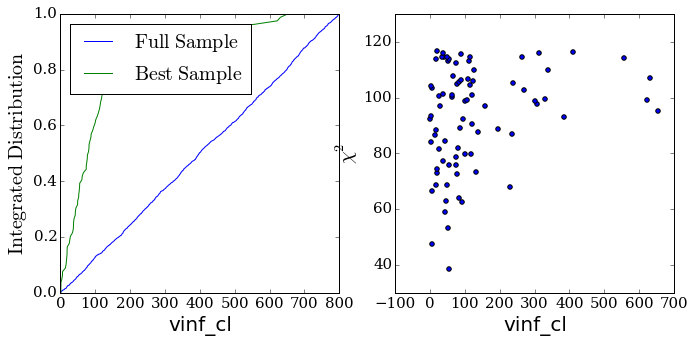

----
zeta_Z
0.947130754617
[-3.41007543 -2.32633927 -1.46264495]


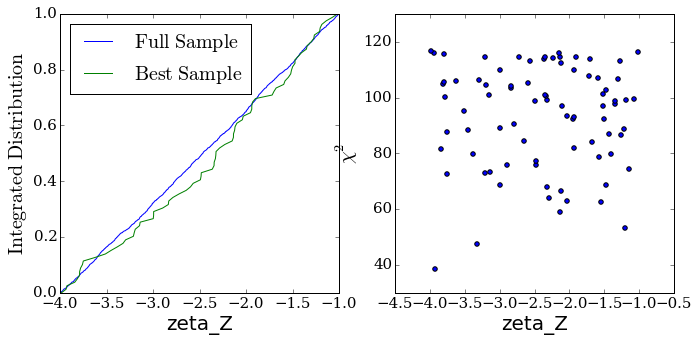

In [186]:
column_log= ['T_ICM', 'n_HI_ICM', 'T_cl', 'n_HI_cl', 'zeta_Z']
column_lin = ['H_em', 'P_cl', 'f_cl', 'sigma_i', 'beta_cl', 'sigma_cl', 'vinf_cl', 'r_cl']
columns = []
change = [] 
values = []
for column in data:
    if column in column_log:
        print "----"
        print column
        best_q = np.log10(best_models[column].quantile([0.16,0.50,0.84]))
        all_q = np.log10(data[column].quantile([0.16,0.50,0.84]))
        delta_all = all_q.values[2] - all_q.values[0]
        delta_best = best_q.values[2] - best_q.values[0]
        print delta_best/delta_all
        print best_q.values
        change.append(delta_best/delta_all)
        columns.append(column)
        values.append(best_q.values)
        plot_distros(np.log10(data[column].values), np.log10(best_models[column].values), 
                     best_models['chisq'].values, column)
    if column in column_lin:
        print "----"
        print column
        best_q = (best_models[column].quantile([0.16,0.50,0.84]))
        all_q = (data[column].quantile([0.16,0.50,0.84]))
        delta_all = all_q.values[2] - all_q.values[0]
        delta_best = best_q.values[2] - best_q.values[0]
        print delta_best/delta_all
        print best_q.values
        change.append(delta_best/delta_all)
        columns.append(column)
        values.append(best_q.values)
        plot_distros((data[column].values), (best_models[column].values),
                     best_models['chisq'].values, column)
        #print column


In [188]:
ii = argsort(change)
for i in ii:
    print columns[i], values[i], change[i]

vinf_cl [  19.766426   79.37578   246.740288] 0.418144690361
sigma_cl [ 46.3522264  71.647375   88.3027644] 0.654848154134
f_cl [ 3.42705297  4.70625708  6.86423361] 0.699896573284
H_em [ 1085.03244  1623.306    2431.51884] 0.790831748016
P_cl [ 0.37612222  0.72949535  0.92119408] 0.796967052637
n_HI_ICM [-10.87767605  -8.9234584   -7.44244524] 0.839257437922
r_cl [  60.5764336  106.58035    160.95088  ] 0.856917720672
n_HI_cl [-0.95853381 -0.24987716  0.22860848] 0.881951118165
T_ICM [ 5.86766399  6.66763163  7.24346928] 0.917956134872
zeta_Z [-3.41007543 -2.32633927 -1.46264495] 0.947130754617
T_cl [ 3.86763635  4.24306535  4.53234083] 0.985899213274
sigma_i [ 22.1121632  52.190555   85.981982 ] 0.998803084283
beta_cl [ 1.2064  1.795   2.2936] 1.1325


In [245]:
from astropy.constants import G, M_sun, kpc, k_B, m_p
from astropy import units as u
sigma_clouds= array([ 46.3522264 , 71.647375 ,  88.3027644])

r = 5.0 * kpc.to('cm')
print r
sigma = sigma_clouds * u.kilometer / u.second
print sigma
dynamical_mass = r * sigma **2 / (2.0*G.cgs)
dynamical_mass.to('M_sun')

1.54283879073e+22 cm
[ 46.3522264  71.647375   88.3027644] km / s


<Quantity [  1.24853104e+09,  2.98303750e+09,  4.53113233e+09] solMass>

```
Results for N=5 best
vinf_cl [ 29.97683736  52.46892     68.2785068 ] 0.0705616037335
n_HI_ICM [-7.58195352 -7.16473233 -7.13761982] 0.108554674233
sigma_cl [ 58.6195304  63.78155    69.8165004] 0.174784770016
T_ICM [ 6.52337985  6.6649067   6.8597901 ] 0.22445752282
f_cl [ 2.04778051  3.01804366  3.50512314] 0.29675167451

H_em [ 1481.18168  1771.094    2281.33804] 0.469955769969
T_cl [ 4.03613616  4.20752342  4.40656762] 0.54942926117

beta_cl [ 1.42    1.6     2.1032] 0.711666666667
n_HI_cl [-0.77192707 -0.55615865  0.19269761] 0.716638456542
P_cl [ 0.29926839  0.7993842   0.86945951] 0.83369472852
sigma_i [ 39.7198884  58.911      94.1873172] 0.851767499901
r_cl [  81.7922428  174.0811     187.0983   ] 0.899019917372
zeta_Z [-3.4624546  -2.13765501 -1.39212802] 1.00690113898


Results for best N=10 
vinf_cl [ 11.77492296  48.606605    88.2894364 ] 0.140959567981
sigma_cl [ 57.0310768  62.41034    74.3336384] 0.270093092145
T_ICM [ 6.42311563  6.67298056  6.97551694] 0.368569716575
n_HI_ICM [-9.22481664 -8.04416023 -7.16092528] 0.504227014347
zeta_Z [-2.62977871 -2.13155433 -1.50638592] 0.546360892923

sigma_i [ 53.517276  73.72816   95.91985 ] 0.6630960051
f_cl [ 2.75050651  4.31840369  6.33245614] 0.729375186298
T_cl [ 3.79169646  4.16784231  4.33223337] 0.801732094508
beta_cl [ 1.348   1.84    2.1316] 0.81625

H_em [ 1151.44036  1711.0505   2567.0448 ] 0.831426840839
P_cl [ 0.24329905  0.78809165  0.8143268 ] 0.834917995006
n_HI_cl [-1.16447244 -0.58346042  0.11720057] 0.952179834709
r_cl [  48.5231096   92.220695   177.731348 ] 1.1030778561

Results for best N=15

vinf_cl [ 18.7711492  49.66307    90.4487244] 0.132048673903
sigma_cl [ 58.9402688  67.01852    77.1646388] 0.284482526893
f_cl [ 3.03528492  4.49425009  5.99339146] 0.602345017725
T_ICM [ 6.13373144  6.68090706  7.19195491] 0.70606119688

n_HI_ICM [-10.62672789  -8.2248358   -7.2184682 ] 0.832668152695

r_cl [  63.6046088   93.53885    165.516676 ] 0.870044712237
zeta_Z [-3.29358593 -2.28724828 -1.49247934] 0.875966280042
n_HI_cl [-1.02255957 -0.55615865  0.16716718] 0.883871163017
H_em [ 1149.72156  1771.094    2696.42284] 0.908423937235
T_cl [ 3.83845661  4.20752342  4.50145978] 0.983375817919
sigma_i [ 29.0982644  70.975      95.2677252] 1.0347651328
beta_cl [ 1.258   1.8     2.2636] 1.0475
P_cl [ 0.18732971  0.7922047   0.9320748 ] 1.0889156849
```

In [229]:
from astropy.constants import G, M_sun, kpc, k_B, m_p
from astropy.cosmology import default_cosmology
from barak import virial
n_points = 100
z = 0.0
mass = logspace(9,12,n_points)
mu = 0.59
km = 1e5
cosmo = default_cosmology.get()
rho_virial = virial.deltavir(z, cosmo=cosmo) * cosmo.critical_density(z) 
M_g = mass * M_sun.cgs
rvir = ((3 * M_g) / (4 * pi * rho_virial))**(1./3)
#print rvir.to('kpc')
vcirc = np.sqrt(G.cgs * M_g / rvir)
#print vcirc.to('km/s')
Tvir = mu * m_p.cgs * vcirc * vcirc / (2 * k_B.cgs)
#print Tvir.to('Kelvin')

[]

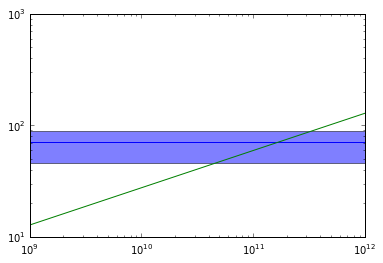

In [230]:
sigma_clouds= array([ 46.3522264 , 71.647375 ,  88.3027644])
y_up = ones(n_points) * sigma_clouds[2]
y_down = ones(n_points) * sigma_clouds[0]
y_center = ones(n_points) * sigma_clouds[1]
fill_between(mass, y_up, y_down, facecolor='blue', alpha=0.5)
plt.plot(mass, y_center)
plt.plot(mass, vcirc.to('km/s'))
plt.loglog()


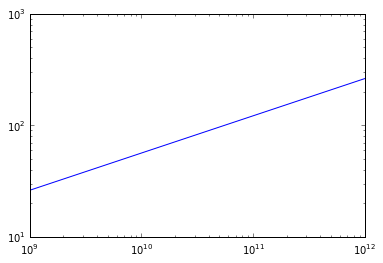

In [231]:
plt.loglog()
plt.plot(mass, rvir.to('kpc'))